# Hands On

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Data Loading 

In [2]:
iris_data = load_iris()
x = iris_data.data
y = iris_data.target

In [3]:
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


convert data to a singl column

In [4]:
y = y.reshape(-1, 1)

In [5]:
print(y[0])
print(y[88])
print(y[149])
print(y.shape)

[0]
[1]
[2]
(150, 1)


# on-hot encoding

In [6]:
y_encoding = keras.utils.to_categorical(y, num_classes=3)

In [7]:
print(y_encoding[0])
print(y_encoding[88])
print(y_encoding[149])
print(y_encoding.shape)

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
(150, 3)


# Train Test Split 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoding, test_size=0.2)

In [9]:
print(x_train[0], x_test[-1])
print(x_train.shape, x_test.shape)

[6.3 3.4 5.6 2.4] [5.5 2.5 4.  1.3]
(120, 4) (30, 4)


In [10]:
print(y_train[0:7],"\n\n", y_test[-7:], "\n")
print(y_train.shape, y_test.shape)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]] 

 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

(120, 3) (30, 3)


# Model Architecture

In [11]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile Model

adam optimizer with learning rate of 0.001

In [13]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model

In [14]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=5,
    validation_split=0.2
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3229 - loss: 1.7642 - val_accuracy: 0.0833 - val_loss: 1.0788
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3854 - loss: 1.4664 - val_accuracy: 0.0833 - val_loss: 1.0632
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3854 - loss: 1.4790 - val_accuracy: 0.0833 - val_loss: 1.0508
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3125 - loss: 1.4003 - val_accuracy: 0.0417 - val_loss: 1.0431
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3542 - loss: 1.2265 - val_accuracy: 0.1250 - val_loss: 1.0279
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3854 - loss: 1.1397 - val_accuracy: 0.0417 - val_loss: 1.0047
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 1.0469 - val_accuracy: 0.1250 - val_loss: 0.9560
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4479 - loss: 0.9473 - val_accuracy: 0.4583 - 

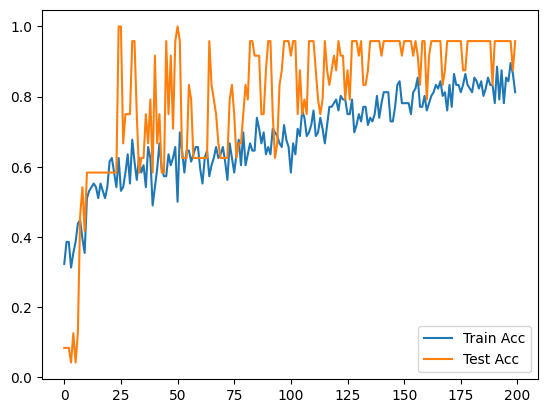

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Train Acc", "Test Acc"])

# Evaluation model on the test data

In [16]:
loss, acc = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9333 - loss: 0.2778


In [17]:
print("\nTesting loss: %.2f, acc: %.2f%%"%(loss, acc))


Testing loss: 0.28, acc: 0.93%
